In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [137]:
df_main = pd.read_csv('with_imp.csv', sep = ';')

In [126]:
df_main['log_SCOPE_2'] = np.log1p(df_main['SCOPE_2'])

In [124]:
df_main.to_csv('with_imp.csv')

In [141]:
df_main.shape

(310, 33)

In [140]:
df_main.describe()

Unnamed: 0         Year  NUMBER_OF_EMPLOYEES       SCOPE_1  \
count  310.000000   310.000000         3.100000e+02  3.100000e+02   
mean   154.500000  2018.538710         2.468391e+05  1.221669e+07   
std     89.633513     1.743258         3.333185e+05  2.763853e+07   
min      0.000000  2015.000000         1.345000e+03  1.530000e+03   
25%     77.250000  2017.000000         9.125000e+04  7.002500e+04   
50%    154.500000  2019.000000         1.740360e+05  6.607330e+05   
75%    231.750000  2020.000000         2.766570e+05  4.312500e+06   
max    309.000000  2022.000000         2.300000e+06  1.321700e+08   

            SCOPE_2     SCOPE 1+2       SCOPE 3  ENERGY_CONSUMPTION_TOTAL  \
count  3.100000e+02  3.100000e+02  7.200000e+01              3.100000e+02   
mean   4.392012e+06  1.884180e+07  1.242244e+08              6.421969e+07   
std    7.770702e+06  4.566998e+07  3.626070e+08              2.456498e+08   
min    0.000000e+00  3.800000e+04  3.676700e+04              8.330000e+02   
25%    5.395160e+05  7.307412e+05  1.269599e+06              5.804890e+06   
50%    1.293358e+06  2.789504e+06  9.757949e+06              3.541670e+07   
75%    4.707500e+06  1.406250e+07  1.496562e+08              6.421969e+07   
max    4.336600e+07  4.470000e+08  2.932682e+09              4.166667e+09   

       TOTAL_WASTE_GENERATED       Income  ...  \
count           3.100000e+02    310.00000  ...   
mean            1.612076e+08  48255.19802  ...   
std             6.918381e+08  15088.59363  ...   
min             8.030000e+02   1680.00000  ...   
25%             6.414000e+04  45002.50000  ...   
50%             7.875130e+05  48255.19802  ...   
75%             1.367655e+08  58912.50000  ...   
max             5.748356e+09  87950.00000  ...   

       GHG Emissions per 1000 dollar GDP  GHG per capita Emissions  \
count                         310.000000                310.000000   
mean                            0.311270                 14.430454   
std                             0.088460                  3.525448   
min                             0.151562                  2.535672   
25%                             0.311270                 14.430454   
50%                             0.311270                 14.430454   
75%                             0.312870                 14.762912   
max                             0.708509                 19.708931   

       log_Revenue   sqrt_Revenue  S1_log_xgboost  S1_log_linear  \
count   310.000000     310.000000      310.000000     310.000000   
mean     25.272359  333653.043958       13.429584      13.480391   
std       0.889806  120980.845638        2.751704       2.774094   
min      22.042351   61155.539406        7.324268       8.991130   
25%      25.009587  269637.268344       11.168315      11.612511   
50%      25.558861  354842.929580       13.420694      12.533391   
75%      25.558861  354842.929580       15.247244      14.997277   
max      27.072335  756280.371291       18.698723      32.498582   

       S1_log_randomf    S1_xgboost  log_Market Cap  log_Total Assets  
count      310.000000  3.100000e+02      310.000000        310.000000  
mean        13.436458  1.190653e+07       25.800243         26.146710  
std          2.672689  2.689119e+07        0.955982          1.239966  
min          8.086455  1.516663e+03       21.901921         21.560513  
25%         11.278564  7.084971e+04       25.332328         25.782801  
50%         13.350040  6.738126e+05       26.106843         26.407656  
75%         15.237910  4.186932e+06       26.225231         26.720323  
max         18.650412  1.320542e+08       28.696077         29.092655  

[8 rows x 29 columns]

In [139]:
#df_main where TOTAL_WASTE_GENERATED <0
df_main

Unnamed: 0  Year             COMPANY_NAME        Country  \
0             0  2016                       HP  United States   
1             1  2016      Reliance Industries          India   
2             2  2017                       HP  United States   
3             3  2021                     Puma        Germany   
4             4  2018            FORD MOTOR CO  United States   
..          ...   ...                      ...            ...   
305         305  2018                    APPLE  United States   
306         306  2016           AMAZON.COM INC  United States   
307         307  2020                      AXA         France   
308         308  2017         PROCTER & GAMBLE  United States   
309         309  2021  China Construction Bank          China   

     NUMBER_OF_EMPLOYEES      SCOPE_1      SCOPE_2    SCOPE 1+2      SCOPE 3  \
0           246839.05694    155682.00    584000.00    739682.00   35860000.0   
1            24121.00000  22446185.00    673289.00  23119474.00          NaN   
2           246839.05694    165138.00    641983.00    807121.00   40770000.0   
3           246839.05694   4046000.00  32545000.00  36591000.00  264005000.0   
4           198964.00000   1270000.00   3110000.00   4380000.00          NaN   
..                   ...          ...          ...          ...          ...   
305         132000.00000     54590.00      8730.00     63320.00   25070000.0   
306         341400.00000   2272176.00   1818190.00   4090366.00          NaN   
307         117623.00000     26292.00     40894.00     67186.00          NaN   
308          95000.00000   2122000.00   2437000.00   4559000.00          NaN   
309         351252.00000    127378.31   1516076.17   1643454.48          NaN   

     ENERGY_CONSUMPTION_TOTAL  ...  GHG Emissions per 1000 dollar GDP  \
0                7.396820e+05  ...                           0.324475   
1                6.421969e+07  ...                           0.433231   
2                8.071220e+05  ...                           0.313959   
3                7.703412e+07  ...                           0.311270   
4                1.380000e+07  ...                           0.312870   
..                        ...  ...                                ...   
305              2.181000e+06  ...                           0.312870   
306              6.421969e+07  ...                           0.324475   
307              2.609920e+05  ...                           0.311270   
308              1.666680e+07  ...                           0.313959   
309              6.421969e+07  ...                           0.311270   

    GHG per capita Emissions  log_Revenue   sqrt_Revenue  S1_log_xgboost  \
0                  19.233536    24.599247  219613.296501       11.966854   
1                   2.535672    24.454246  204254.742907       16.927515   
2                  18.910510    24.675471  228144.690931       11.992677   
3                  14.430454    22.791394   88938.180777       15.209607   
4                  19.272537    25.800500  400412.287524       14.059859   
..                       ...          ...            ...             ...   
305                19.272537    26.290121  511478.249782       10.998343   
306                19.233536    25.558861  354842.929580       14.388442   
307                14.430454    25.539021  351340.290886       10.174554   
308                18.910510    25.558861  354842.929580       14.731082   
309                14.430454    25.568555  356566.964258       11.515563   

     S1_log_linear  S1_log_randomf   S1_xgboost  log_Market Cap  \
0        11.787593       11.946775    157448.56       23.954070   
1        16.937277       17.010012  22466032.00       24.572775   
2        11.744171       11.904359    161567.25       24.265963   
3        14.949467       15.346292   4031331.00       23.626334   
4        14.084731       14.075812   1276789.50       24.161759   
..             ...             ...          ...             ...   
305 

In [ ]:
#replace the rows with

### Target Distribution

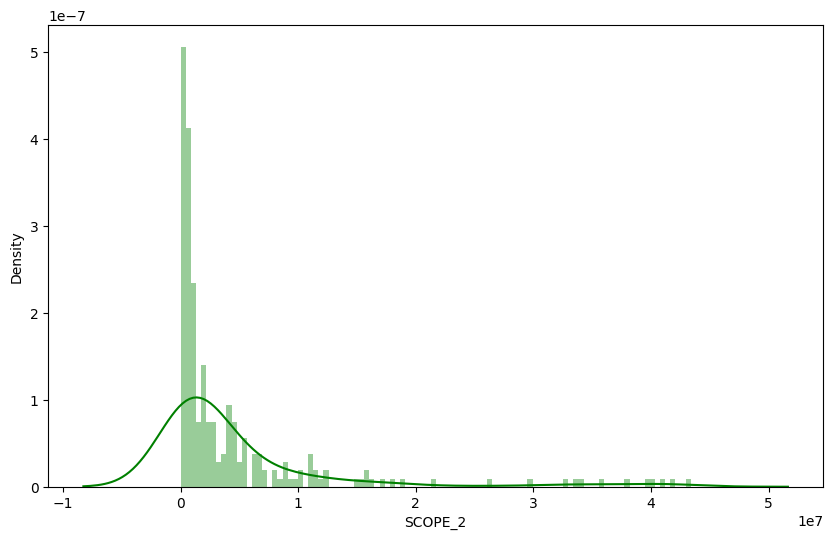

In [121]:
#plot distribution of target variable
plt.figure(figsize=(10,6))  
sns.distplot(df_train['SCOPE_2'], color='g', bins=100, hist_kws={'alpha': 0.4});

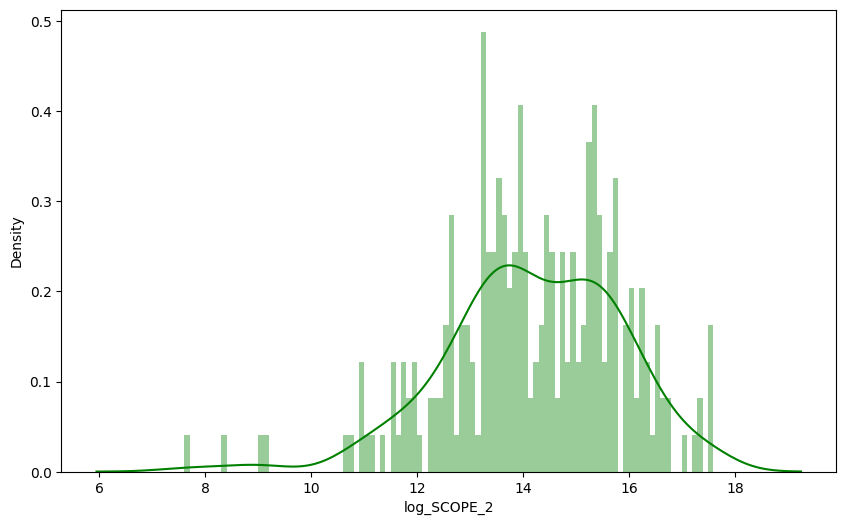

In [59]:
#plot distribution of target variable
plt.figure(figsize=(10,6))  
sns.distplot(df_train['log_SCOPE_2'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
#bimoalr distribution of the target, maybe 

In [55]:
#get the outliers in the target variable and corresponding row in the dataframe df_main
outliers = df_train[df_train['log_SCOPE_2'] == 0]
outliers

Year COMPANY_NAME        Country  NUMBER_OF_EMPLOYEES  SCOPE_1  SCOPE_2  \
28  2020        APPLE  United States             147000.0  47430.0      0.0   
27  2019        APPLE  United States             137000.0  52730.0      0.0   

    SCOPE 1+2     SCOPE 3  ENERGY_CONSUMPTION_TOTAL  TOTAL_WASTE_GENERATED  \
28    47430.0  22550000.0                 2580000.0           4.499169e+09   
27    52730.0  24980000.0                 2427000.0           5.748356e+09   

    ... TTM Gross Profit  Gross Margin  ISIC Division  log_SCOPE_1  \
28  ...     1.064350e+11      0.383275  Manufacturing     10.76701   
27  ...     9.912250e+10      0.379300  Manufacturing     10.87294   

    log_SCOPE_2  GHG Emissions  GHG Emissions per 1000 dollar GDP  \
28          0.0    4519.886805                            0.31127   
27          0.0    4519.886805                            0.31127   

    GHG per capita Emissions log_Revenue   sqrt_Revenue  
28                 14.430454   26.407288  542337.533276  
27                 14.430454   26.313058  517378.004944  

[2 rows x 26 columns]

In [57]:
#drop the rows with outliers
df_train = df_train.drop([28,27], axis=0)

In [98]:
df_test


Year            COMPANY_NAME         Country  NUMBER_OF_EMPLOYEES  \
289  2021              Zalando SE         Germany         246839.05694   
9    2019                 ALLIANZ         Germany         147268.00000   
57   2018               BMW STAMM         Germany         134682.00000   
60   2021                      BP   United States          65900.00000   
25   2017                   APPLE   United States         123000.00000   
..    ...                     ...             ...                  ...   
198  2017                    Puma         Germany         246839.05694   
195  2021        PROCTER & GAMBLE   United States         101000.00000   
210  2016  Samsung Electronics Co     South Korea         277000.00000   
224  2021               Shell Plc  United Kingdom          82000.00000   
158  2021         LVMH MOET HENNE          France         175647.00000   

        SCOPE_1     SCOPE_2    SCOPE 1+2      SCOPE 3  \
289    769000.0   2414000.0    3183000.0  557896400.0   
9       42011.0    281548.0     323559.0     149459.0   
57     581703.0    538622.0    1120325.0          NaN   
60   33200000.0   2400000.0   35600000.0          NaN   
25      45400.0     36250.0      81650.0   27330000.0   
..          ...         ...          ...          ...   
198   7678000.0  40029000.0   47707000.0  208525000.0   
195   2242000.0    156000.0    2398000.0          NaN   
210   2554000.0   9556000.0   12110000.0          NaN   
224  91000000.0  10937254.0  101937254.0  601524576.0   
158     71390.0    304349.4     375740.0          NaN   

     ENERGY_CONSUMPTION_TOTAL  TOTAL_WASTE_GENERATED  ... TTM Gross Profit  \
289              1.830570e+05           3.105800e+04  ...     4.822500e+09   
9                7.703279e+07           1.939600e+04  ...     5.097403e+10   
57               5.788965e+06           7.898170e+05  ...     5.097403e+10   
60               1.288050e+08           3.701000e+05  ...     4.047250e+10   
25               1.832000e+06           5.297313e+09  ...     8.771750e+10   
..                        ...                    ...  ...              ...   
198              2.351410e+08           5.293000e+03  ...     5.097403e+10   
195              6.421969e+07           1.367655e+08  ...     3.875750e+10   
210              2.107300e+07           1.078310e+06  ...     5.097403e+10   
224              2.230000e+08           1.993000e+06  ...     5.097403e+10   
158              1.367340e+06           1.135800e+05  ...     5.097403e+10   

     Gross Margin                                      ISIC Division  \
289      0.426200  Wholesale and retail trade; repair of motor ve...   
9        0.485876                 Financial and insurance activities   
57       0.485876  Wholesale and retail trade; repair of motor ve...   
60       0.295300                               Mining and quarrying   
25       0.384550                                      Manufacturing   
..            ...                                                ...   
198      0.485876  Wholesale and retail trade; repair of motor ve...   
195    506.000000  Wholesale and retail trade; repair of motor ve...   
210      0.485876                                      Manufacturing   
224      0.485876                               Mining and quarrying   
158      0.485876  Wholesale and retail trade; repair of motor ve...   

     log_SCOPE_1  log_SCOPE_2  GHG Emissions  \
289    13.552846    14.696796    4519.886805   
9      10.645687    12.548062    4519.886805   
57     13.273715    13.196771     873.595883   
60     17.318060    14.690980    4519.886805   
25     10.723267    10.498222    6135.685196   
..           ...          ...            ...   
198    15.853870    17.505115     898.171335   
195    14.622879    11.957618    4519.886805   
210    14.753171    16.072680     731.432998   
224    18.326370    16.207685    4519.886805   
158    11.175913    12.625935    4519.886805   

     GHG Emissions per 1000 dollar GDP  GHG per capi

In [96]:
df_train

Year            COMPANY_NAME        Country  NUMBER_OF_EMPLOYEES  \
126  2017           FORD MOTOR CO  United States         202275.00000   
109  2019                     ENI          Italy           1537.00000   
247  2019                 TENCENT          China          62885.00000   
234  2018               SONY CORP          Japan         117300.00000   
202  2021                    Puma        Germany         246839.05694   
..    ...                     ...            ...                  ...   
188  2018            PJSC Gazprom         Russia         466100.00000   
71   2017            CHEVRON CORP  United States          51754.00000   
106  2020        DEUTSCHE TELEKOM        Germany         226291.00000   
270  2020  VERIZON COMMUNICATIONS  United States         132200.00000   
102  2016        DEUTSCHE TELEKOM        Germany         221000.00000   

          SCOPE_1     SCOPE_2     SCOPE 1+2      SCOPE 3  \
126  1.320000e+06   3120000.0  4.440000e+06          NaN   
109  4.514944e+06    172399.0  4.687343e+06          NaN   
247  4.101080e+03    852686.0  8.567871e+05          NaN   
234  2.342910e+05   1156316.0  1.390607e+06          NaN   
202  4.046000e+06  32545000.0  3.659100e+07  264005000.0   
..            ...         ...           ...          ...   
188  1.200900e+08   8210000.0  1.283000e+08          NaN   
71   6.700000e+07   9000000.0  4.470000e+08  380000000.0   
106  2.352610e+05  15023000.0  1.525826e+07   17867000.0   
270  3.368310e+05   3753660.0  4.090491e+06          NaN   
102  2.905410e+05   3878321.0  4.168862e+06          NaN   

     ENERGY_CONSUMPTION_TOTAL  TOTAL_WASTE_GENERATED  ... Gross Margin  \
126              6.421969e+07           1.367655e+08  ...     0.161900   
109              6.421969e+07           1.367655e+08  ...     0.277900   
247              6.421969e+07           1.367655e+08  ...     0.441850   
234              7.702949e+07           5.454400e+04  ...     0.399075   
202              7.703412e+07           5.215000e+03  ...     0.485876   
..                        ...                    ...  ...          ...   
188              7.700782e+07           2.859000e+05  ...     0.485876   
71               6.421969e+07           1.367655e+08  ...     0.379900   
106              1.280000e+07           7.052800e+04  ...     0.554125   
270              6.421969e+07           1.367655e+08  ...     0.593850   
102              8.500000e+06           6.696000e+04  ...     0.462550   

                                         ISIC Division  log_SCOPE_1  \
126  Wholesale and retail trade; repair of motor ve...    14.093142   
109                               Mining and quarrying    15.322903   
247                      Information and communication     8.319006   
234                                      Manufacturing    12.364319   
202  Wholesale and retail trade; repair of motor ve...    15.213239   
..                                                 ...          ...   
188                               Mining and quarrying    18.603752   
71                                Mining and quarrying    18.020203   
106                      Information and communication    12.368451   
270                      Information and communication    12.727337   
102                      Information and communication    12.579500   

     log_SCOPE_2  GHG Emissions  GHG Emissions per 1000 dollar GDP  \
126    14.953344    6135.685196                           0.313959   
109    12.057573    4519.886805                           0.311270   
247    13.656148    4519.886805                           0.311270   
234    13.960751    1270.211563                           0.243767   
202    17.298134    4519.886805                           0.311270   
..           ...            ...                                ...   
188    15.920864    2313.734767                           0.591147   
71     16.012735    6135.685196                           0.313959   
106    16.525093    4519.886805    

## Check Correlations

In [46]:
df_corr = df_train.drop(columns=['SCOPE_1', 'SCOPE 1+2', 'log_Revenue'])

In [47]:
correlation_matrix_scope2 = df_corr.corr()

In [48]:
plt.figure(figsize=(24,13),dpi=1000)
sns.heatmap(
    correlation_matrix_scope2,
    cmap='coolwarm',
    linecolor='white',
    linewidth=2,
    annot=True,
    vmin=-1, 
    vmax=1);

# Fetures need improvement to get better results

In [97]:
df_train.dtypes

Year                                   int64
COMPANY_NAME                          object
Country                               object
NUMBER_OF_EMPLOYEES                  float64
SCOPE_1                              float64
SCOPE_2                              float64
SCOPE 1+2                            float64
SCOPE 3                              float64
ENERGY_CONSUMPTION_TOTAL             float64
TOTAL_WASTE_GENERATED                float64
Income group                          object
Income                               float64
Market Cap                           float64
Revenue                              float64
Total Assets                         float64
TTM Revenue                          float64
TTM Gross Profit                     float64
Gross Margin                         float64
ISIC Division                         object
log_SCOPE_1                          float64
log_SCOPE_2                          float64
GHG Emissions                        float64
GHG Emissi

## Employees

<Axes: xlabel='log_SCOPE_2', ylabel='NUMBER_OF_EMPLOYEES'>

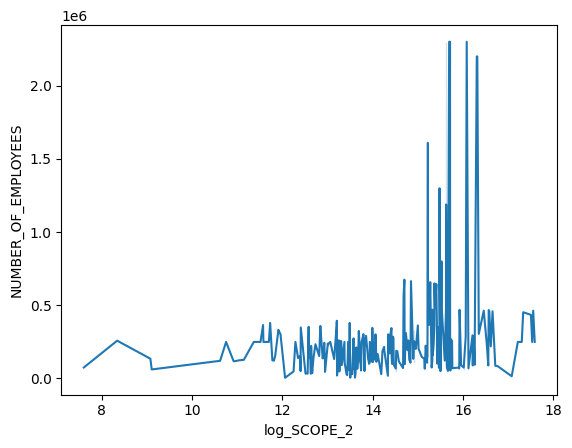

In [64]:
# line plot df_main['log_SCOPE_2'] vs Num of emoloyees
sns.lineplot(x=df_train['log_SCOPE_2'], y=df_train['NUMBER_OF_EMPLOYEES'])

<Axes: xlabel='log_SCOPE_2', ylabel='NUMBER_OF_EMPLOYEES'>

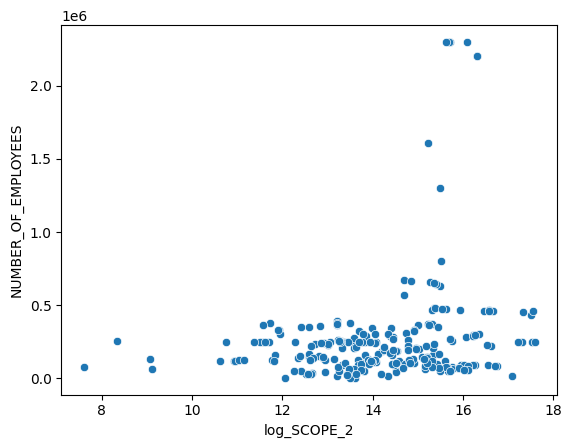

In [63]:
# line plot df_main['log_SCOPE_2'] vs Revenue
sns.scatterplot(x=df_train['log_SCOPE_2'], y=df_train['NUMBER_OF_EMPLOYEES'])

In [74]:
#number of employees is highly correlated with TTM Revenue so make a feature TTM revenue per employee
df_train['TTM_REVENUE_PER_EMPLOYEE'] = df_train['Revenue'] / df_train['NUMBER_OF_EMPLOYEES']

<Axes: xlabel='log_SCOPE_2', ylabel='TTM_REVENUE_PER_EMPLOYEE'>

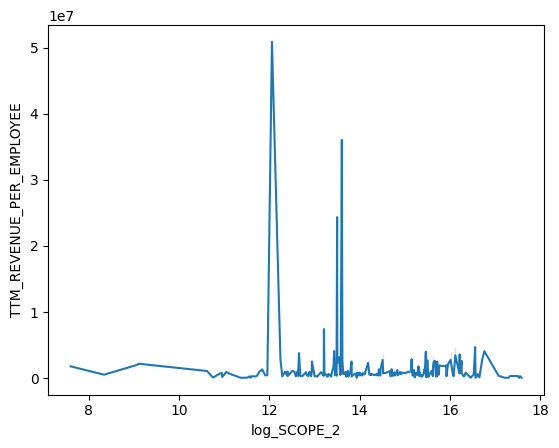

In [75]:
#plot TTM_REVENUE_PER_EMPLOYEE vs log_SCOPE_2
sns.lineplot(x=df_train['log_SCOPE_2'], y=df_train['TTM_REVENUE_PER_EMPLOYEE'])

In [76]:
#find correlation between TTM_REVENUE_PER_EMPLOYEE and log_SCOPE_2
df_train['log_SCOPE_2'].corr(df_train['TTM_REVENUE_PER_EMPLOYEE'])

-0.06281624585295278

In [85]:
import statsmodels as sm

<Axes: xlabel='log_SCOPE_2', ylabel='TTM_REVENUE_PER_EMPLOYEE'>

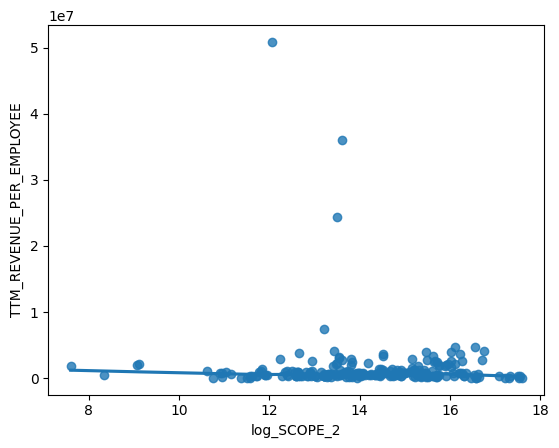

In [86]:
#apply LOESS smoothing to the scatter plot
sns.regplot(x=df_train['log_SCOPE_2'], y=df_train['TTM_REVENUE_PER_EMPLOYEE'], lowess=True)

### Income

<Axes: xlabel='log_SCOPE_2', ylabel='Income'>

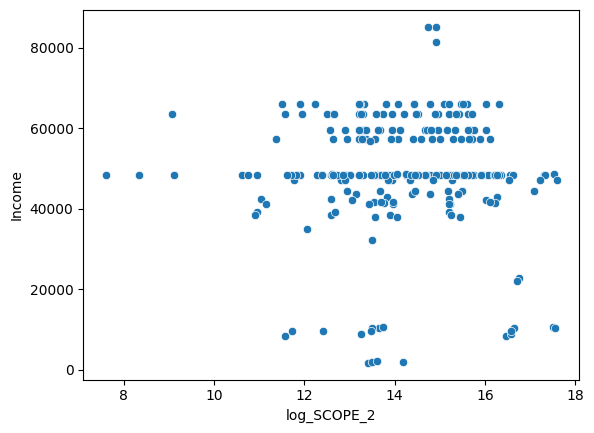

In [87]:
#plot relationship between Income and log_SCOPE_2
sns.scatterplot(x=df_train['log_SCOPE_2'], y=df_train['Income'])

<Axes: xlabel='log_SCOPE_2', ylabel='GHG Emissions'>

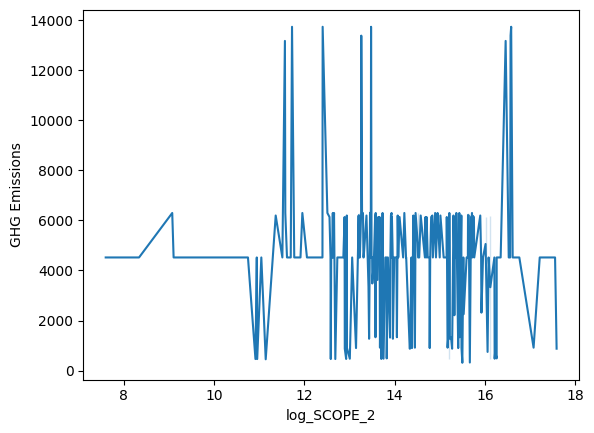

In [93]:
#plot relationship between GHG emissions and log_SCOPE_2
sns.lineplot(x=df_train['log_SCOPE_2'], y=df_train['GHG Emissions'])

In [ ]:
#next steps: add log scope 1 predicted from beofre to df_main and use as feature 
# rerun the model 

In [99]:
#concat test and traim dataframes
df_main = pd.concat([df_train, df_test], axis=0)

In [101]:
df_main.to_csv('with_imp.csv', index=False)

In [102]:
df_main

Year            COMPANY_NAME         Country  NUMBER_OF_EMPLOYEES  \
126  2017           FORD MOTOR CO   United States         202275.00000   
109  2019                     ENI           Italy           1537.00000   
247  2019                 TENCENT           China          62885.00000   
234  2018               SONY CORP           Japan         117300.00000   
202  2021                    Puma         Germany         246839.05694   
..    ...                     ...             ...                  ...   
198  2017                    Puma         Germany         246839.05694   
195  2021        PROCTER & GAMBLE   United States         101000.00000   
210  2016  Samsung Electronics Co     South Korea         277000.00000   
224  2021               Shell Plc  United Kingdom          82000.00000   
158  2021         LVMH MOET HENNE          France         175647.00000   

         SCOPE_1     SCOPE_2     SCOPE 1+2      SCOPE 3  \
126   1320000.00   3120000.0  4.440000e+06          NaN   
109   4514944.00    172399.0  4.687343e+06          NaN   
247      4101.08    852686.0  8.567871e+05          NaN   
234    234291.00   1156316.0  1.390607e+06          NaN   
202   4046000.00  32545000.0  3.659100e+07  264005000.0   
..           ...         ...           ...          ...   
198   7678000.00  40029000.0  4.770700e+07  208525000.0   
195   2242000.00    156000.0  2.398000e+06          NaN   
210   2554000.00   9556000.0  1.211000e+07          NaN   
224  91000000.00  10937254.0  1.019373e+08  601524576.0   
158     71390.00    304349.4  3.757400e+05          NaN   

     ENERGY_CONSUMPTION_TOTAL  TOTAL_WASTE_GENERATED  ... Gross Margin  \
126              6.421969e+07           1.367655e+08  ...     0.161900   
109              6.421969e+07           1.367655e+08  ...     0.277900   
247              6.421969e+07           1.367655e+08  ...     0.441850   
234              7.702949e+07           5.454400e+04  ...     0.399075   
202              7.703412e+07           5.215000e+03  ...     0.485876   
..                        ...                    ...  ...          ...   
198              2.351410e+08           5.293000e+03  ...     0.485876   
195              6.421969e+07           1.367655e+08  ...   506.000000   
210              2.107300e+07           1.078310e+06  ...     0.485876   
224              2.230000e+08           1.993000e+06  ...     0.485876   
158              1.367340e+06           1.135800e+05  ...     0.485876   

                                         ISIC Division  log_SCOPE_1  \
126  Wholesale and retail trade; repair of motor ve...    14.093142   
109                               Mining and quarrying    15.322903   
247                      Information and communication     8.319006   
234                                      Manufacturing    12.364319   
202  Wholesale and retail trade; repair of motor ve...    15.213239   
..                                                 ...          ...   
198  Wholesale and retail trade; repair of motor ve...    15.853870   
195  Wholesale and retail trade; repair of motor ve...    14.622879   
210                                      Manufacturing    14.753171   
224                               Mining and quarrying    18.326370   
158  Wholesale and retail trade; repair of motor ve...    11.175913   

     log_SCOPE_2  GHG Emissions  GHG Emissions per 1000 dollar GDP  \
126    14.953344    6135.685196                           0.313959   
109    12.057573    4519.886805                           0.311270   
247    13.656148    4519.886805                           0.311270   
234    13.960751    1270.211563                           0.243767   
202    17.298134    4519.886805                           0.311270   
..           ...            ...                                ...   
198    17.505115     898.171335                           0.205206   
195    11.957618    4519.886805                           0.311270   
210    16.072680     731.432998    

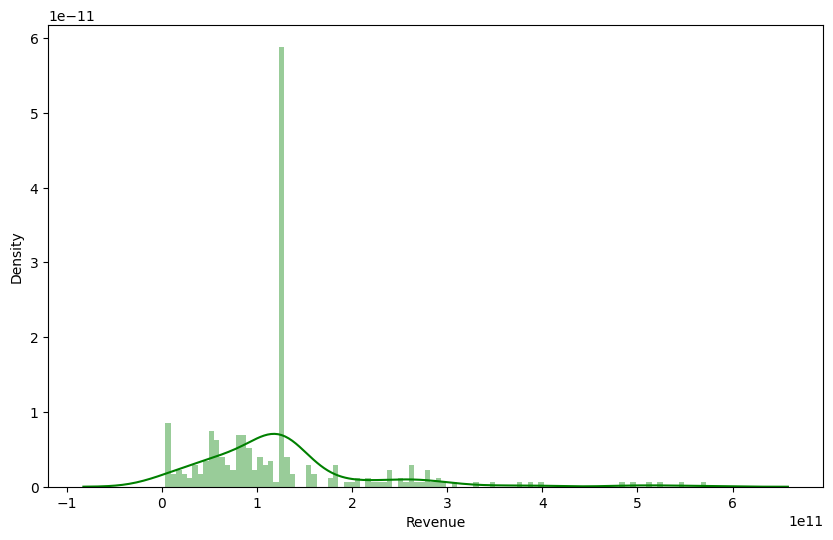

In [105]:
#plot ditribution of Revenue
plt.figure(figsize=(10,6))
sns.distplot(df_main['Revenue'], color='g', bins=100, hist_kws={'alpha': 0.4});

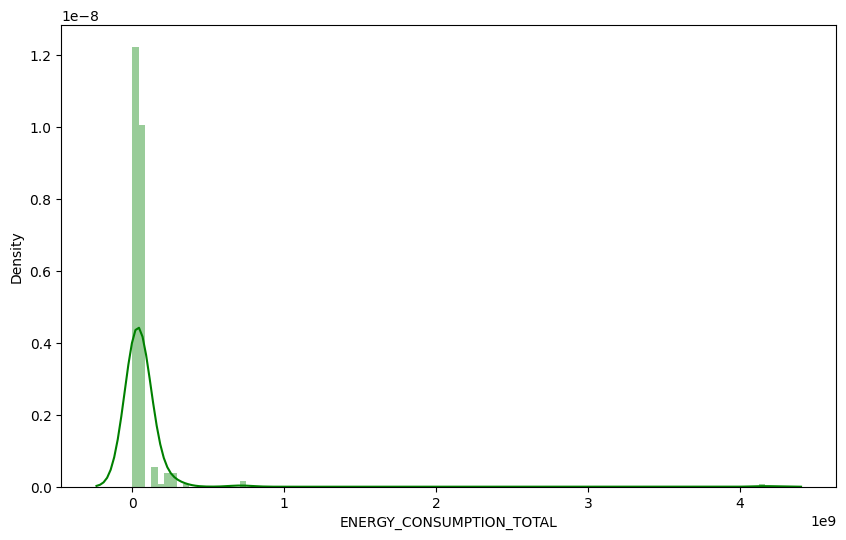

In [106]:
#plot ditribution of ENERGY_CONSUMPTION_TOTAL
plt.figure(figsize=(10,6))  
sns.distplot(df_main['ENERGY_CONSUMPTION_TOTAL'], color='g', bins=100, hist_kws={'alpha': 0.4});

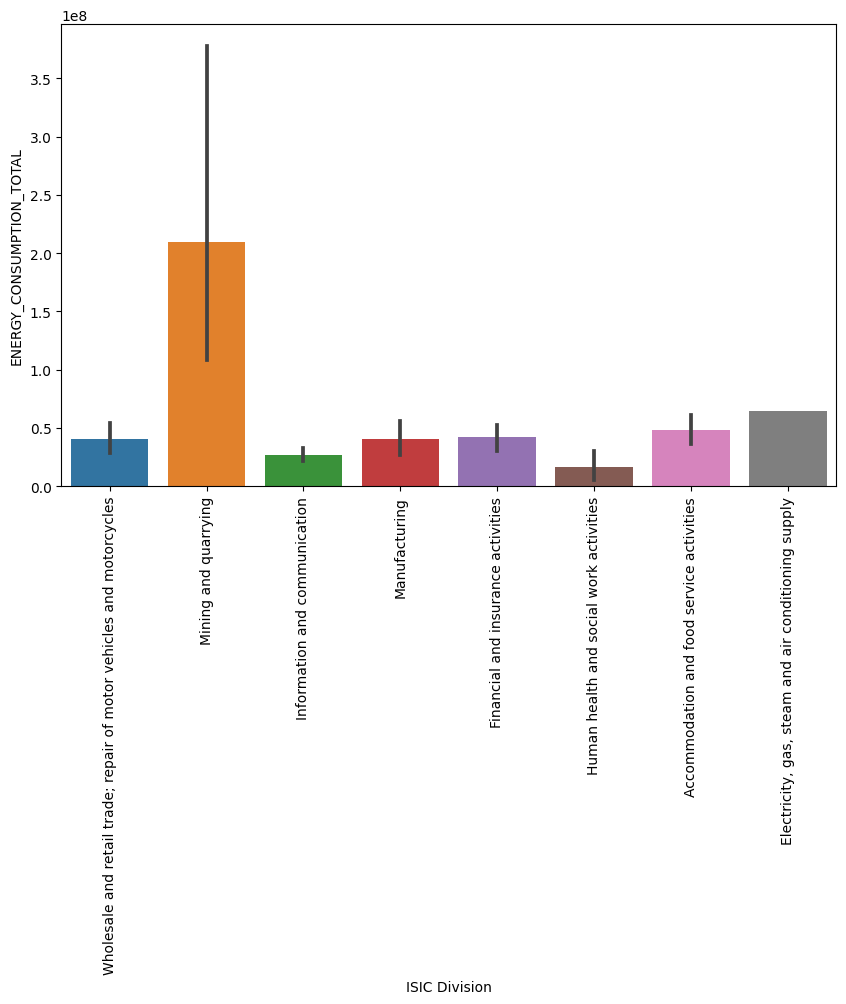

In [111]:
#plot ENERGY_CONSUMPTION_TOTAL per ISIC Division with rotation of xticks
plt.figure(figsize=(10,6))
sns.barplot(x=df_main['ISIC Division'], y=df_main['ENERGY_CONSUMPTION_TOTAL'])
plt.xticks(rotation=90);


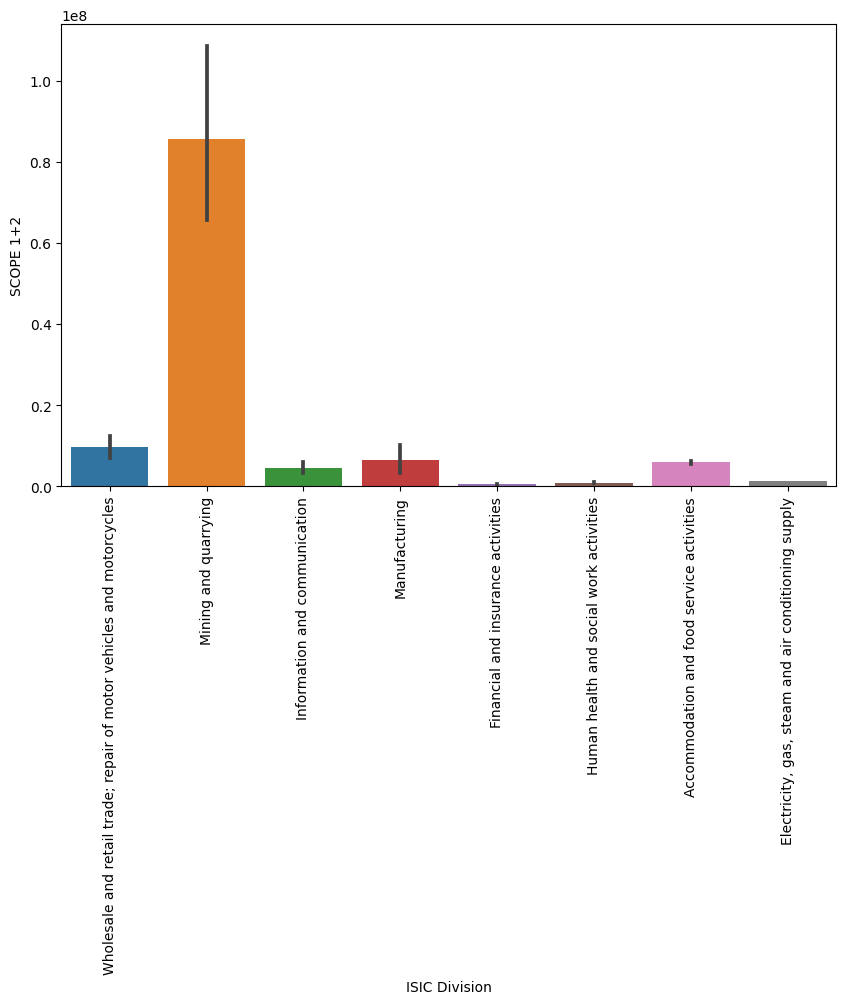

In [112]:
#plot SCOPE 1+2  per ISIC Division with rotation of xticks
plt.figure(figsize=(10,6))
sns.barplot(x=df_main['ISIC Division'], y=df_main['SCOPE 1+2'])
plt.xticks(rotation=90);

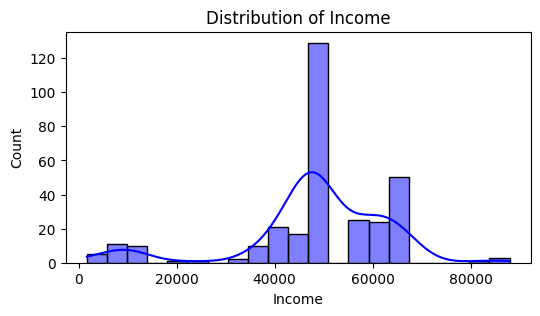

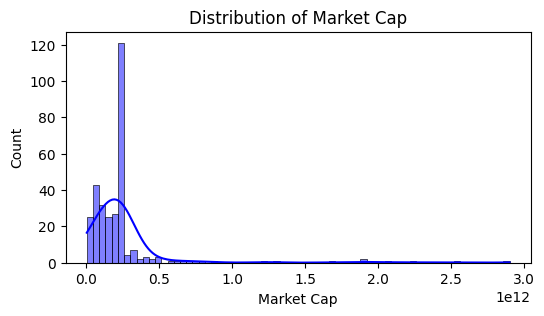

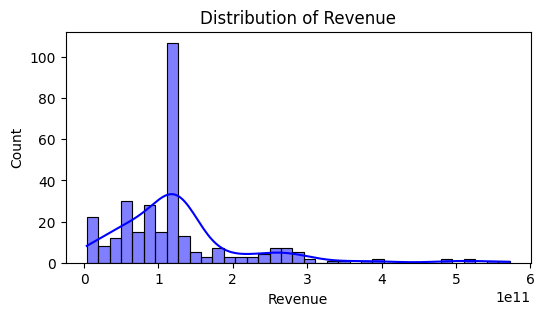

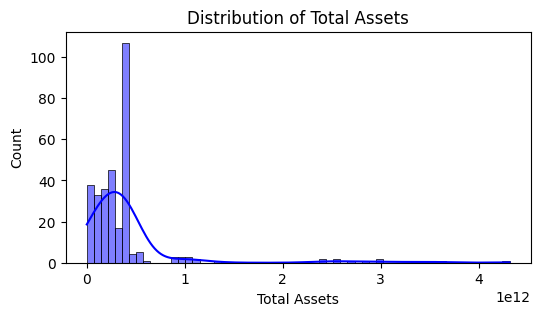

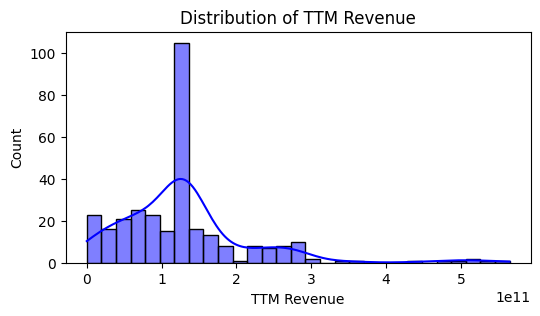

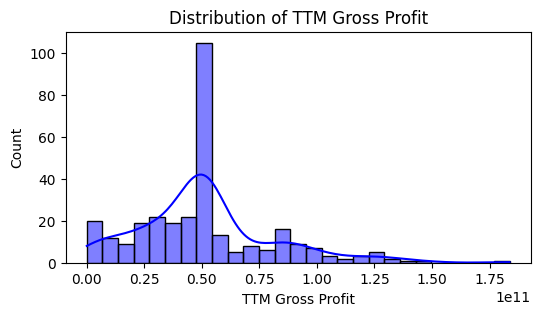

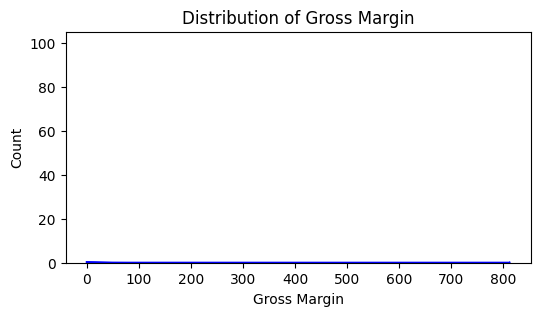

In [129]:
# plot distributions of Income, Market Cap,Revenue,Total Assets,TTM Revenue, TTM Gross Profit, Gross Margin

columns = ['Income', 'Market Cap', 'Revenue', 'Total Assets', 'TTM Revenue', 'TTM Gross Profit', 'Gross Margin']

# For each column
for col in columns:
    # Plot histogram
    plt.figure(figsize=(6, 3))
    sns.histplot(df_main[col], kde=True, color='b') # kde=False if you don't want density estimate
    plt.title('Distribution of '+col)
    plt.show()



In [130]:
#Total assests and Market cap look skewed, so apply log transformation
df_main['log_Market Cap'] = np.log(df_main['Market Cap'])
df_main['log_Total Assets'] = np.log(df_main['Total Assets'])

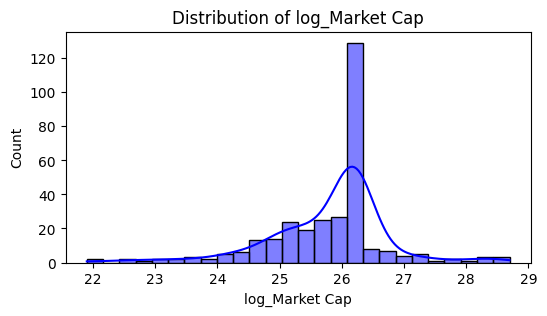

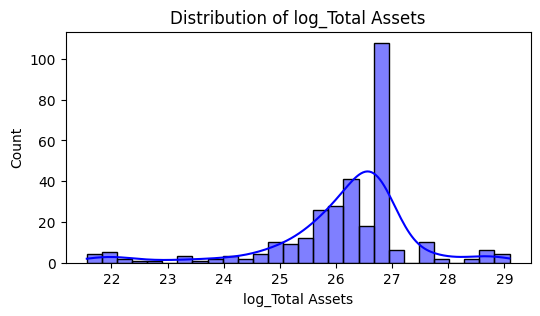

In [131]:
#plot distributions of log_Market Cap, log_Total Assets
columns = ['log_Market Cap', 'log_Total Assets']
# For each column
for col in columns:
    # Plot histogram
    plt.figure(figsize=(6, 3))
    sns.histplot(df_main[col], kde=True, color='b') # kde=False if you don't want density estimate
    plt.title('Distribution of '+col)
    plt.show()